#Intro
## Análise compartamental de clientes para predição da inadimplência em setores bancários

 A inadimplência é um dos principais desafios enfrentados pelo setor bancário, impactando diretamente a rentabilidade e a sustentabilidade das operações. Neste projeto, irei desenvolver um modelo de machine learning para prever a inadimplência de um cliente de um determinado banco, com base em seus comportamentos. Realizarei uma análise exploratória de dados para tentar identificar padrões e tendências que possam trazer insights sobre o perfil dos clientes. Desta forma, será possível ajudar o setor bancário com alguns perfis e comportamentos que influenciam no padrão de Default antes mesmo de ter o modelo pronto. Irei utilizar modelos de aprendizagem supervisionada, baseada em algoritmos de classificação.


 O dataset utilizado como base foi retirada do site Kaggle.
 [Link da base de dados](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fsrgiolutzer%2Flimite-de-crdito-bancrio%3Fresource%3Ddownload)

Usarei a seguinte estrutura, baseada na metodologia Crisp-DM.

1- Entendimento do negócio

2- Entendimento dos dados
  
3- Preparação dos dados

4- Criação do modelo

5- Avaliação



#Entendimento do negócio

Um banco está buscando entender quais os fatores que podem influenciar um cliente a se tornar inadimplente. Para tal, coletou através de formulários e pesquisas, informações demográficas, dados financeiros, escolaridade entre outros. O banco espera que, com essas informações seja possível criar um modelo de classificação que encontre tendências e padrões que possam auxiliá-lo a tomar decisões antes que o cliente fique inadimplente.

##Objetivos

1. Identificar os fatores que podem influenciar o padrão de inadimplência.
2. Analisar e compreender o perfil dos clientes do banco e fornecer insights sobre as suas ações e tendências.
3. Oferecer um plano de ação para o banco para reduzir um número de clientes inadimplentes, com base na análise exploratória dos dados e na criação do nosso modelo.

##Quais são os beneficios?

1. Economia de custos
2. Melhor experiência do cliente
3. Marketing direcionado
4. Proteção de receita
5. Solução do problema inicial

# Imports, dicionário de dados e funções

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#Definição da paleta de cores
paleta_cores = ['#004C50', '#00939C', '#10ABB4', '#9C3E00', '#502000']

sns.set_palette(sns.color_palette(paleta_cores))

sns.color_palette(paleta_cores)

[(0.0, 0.2980392156862745, 0.3137254901960784),
 (0.0, 0.5764705882352941, 0.611764705882353),
 (0.06274509803921569, 0.6705882352941176, 0.7058823529411765),
 (0.611764705882353, 0.24313725490196078, 0.0),
 (0.3137254901960784, 0.12549019607843137, 0.0)]

##Dicionário de dados

sexo: O gênero do cliente.

dependentes: Número de dependentes que o cliente possui.

escolaridade: Nível de escolaridade do cliente.

estado_civil: Estado civil do cliente.

salario_anual: Renda anual do cliente.

tipo_cartao: Tipo de cartão de crédito que o cliente possui.

meses_de_relacionamento: Quantidade de meses que o cliente tem um relacionamento com o banco.

qtd_produtos: Quantidade de produtos que o cliente tem com o banco.

iteracoes_12m: Quantidade de interações que o cliente teve com o banco nos últimos 12 meses.

meses_inativo_12m: Quantidade de meses que o cliente esteve inativo nos últimos 12 meses.

limite_credito: Limite de crédito do cliente.

valor_transacoes_12m: Valor total das transações que o cliente fez nos últimos 12 meses.

qtd_transacoes_12m: Quantidade total de transações que o cliente fez nos últimos 12 meses.

##**Funções**

Abaixo seguem todas as funções criadas para o projeto.

In [ ]:
def remove_virgulas(df):

  """Remove pontos e espaços em branco de colunas numéricas formatadas como texto.

  Esta função percorre as colunas do DataFrame e remove pontos e espaços
  em branco que podem impedir a interpretação numérica correta.

  Args:
    df: O DataFrame do pandas a ser processado.

  Returns:
    O DataFrame com as colunas numéricas limpas.
  """

  for coluna in df.columns:
    if df[coluna].dtype == 'object':
      df[coluna] = df[coluna].str.replace(r'[.\s]', '', regex=True)

def substitui_virgulas(df):

  """Substitui vírgulas por pontos em colunas numéricas.

  Esta função padroniza o separador decimal para pontos, garantindo que o Pandas
  interprete corretamente os números.

  Args:
    df: O DataFrame do pandas a ser processado.

  Returns:
    O DataFrame com o separador decimal padronizado.
  """

  for coluna in df.columns:
    if df[coluna].dtype == 'object':
      df[coluna] = df[coluna].str.replace(',', '.', regex=False)

def converte_para_float(df):

  """Converte as colunas 'limite_credito' e 'valor_transacoes_12m' para float.

  Esta função converte as colunas especificadas para o tipo de dado numérico,
  permitindo que sejam usadas em cálculos.

  Args:
    df: O DataFrame do pandas a ser processado.

  Returns:
    O DataFrame com as colunas convertidas para float.
  """

  df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')

  df['valor_transacoes_12m'] = pd.to_numeric(df['valor_transacoes_12m'], errors='coerce')

def calcular_intervalo_confianca(coluna, nivel_confianca):
  """
    Calcula o intervalo de confiança para a média de uma coluna numérica de um DataFrame.

    Esta função calcula o intervalo de confiança para a média de uma coluna especificada, assumindo uma distribuição normal. Os limites inferior e superior do intervalo de confiança são calculados e armazenados nas variáveis globais 'limite_inferior' e 'limite_superior'. O resultado é impresso no console.

    Args:
      coluna: O nome da coluna numérica do DataFrame para a qual o intervalo de
      confiança será calculado.
      nivel_confianca: O nível de confiança desejado para o intervalo (ex: 0.95 para um intervalo de confiança de 95%).

    Returns:
      None. O intervalo de confiança é impresso no console e os limites são
      armazenados nas variáveis globais `limite_inferior` e `limite_superior`.

    Exemplo:
      calcular_intervalo_confianca('idade', 0.95)

  """

  #Nível de confiança desejado
  confianca = nivel_confianca

  #Cálculo da média, desvio padrão, e o tamanho da amostra
  media = df[coluna].mean()
  desvio_padrao = df[coluna].std()
  tamanho_amostra = len(df[coluna])

  #Utilizando a função interval do método norm do módulo scypy.stats para calcular o intervalo de confiança
  intervalo_confianca = st.norm.interval(confidence=0.95, loc=media, scale=desvio_padrao / np.sqrt(tamanho_amostra))

  #Por padrão, a função interval, retorna os limites mínimos e máximos num único array. Para fins de visualização, irei atribuir esses limites a respectivas váriaveis. Usarei global para poder usar esses limites fora do escopo da função.
  global limite_inferior, limite_superior

  limite_inferior = intervalo_confianca[0]
  limite_superior = intervalo_confianca[1]

  #Resultado
  print(f"Intervalo de confiança para a média da idade com {confianca*100}% de confiança: (Limite inferior: {limite_inferior:.1f}, Limite superior: {limite_superior:.1f})")


def gerar_grafico_ditr_norm(coluna):
  """
    Gera um histograma com a distribuição de uma coluna e o intervalo de confiança.

    Esta função gera um histograma da coluna especificada de um DataFrame, juntamente com uma representação visual do intervalo de confiança calculado previamente pela função `calcular_intervalo_confianca`. A área sombreada no histograma representa o intervalo de confiança.

    Args:
      coluna: O nome da coluna numérica do DataFrame para a qual o histograma será gerado.

    Returns:
      None. O histograma com o intervalo de confiança é exibido.

    Exemplo:
      gerar_grafico_ditr_norm('idade')

  """

  #Cria o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(df[coluna], bins=20, kde=True,)

  #Definição da variável index para armazenar o index da coluna
  index = df.columns.get_loc(coluna)

  plt.fill_betweenx([0, df[coluna].max()*15],  #Utilizarei o fill_betweenx para criar uma área sombreada que denotará a média
                   limite_inferior, limite_superior,  #Limites do intervalo
                   color= paleta_cores[3], alpha=0.3, label='Intervalo de Confiança (95%)')

  plt.title(f"Gráfico de Distribuição de {df.columns[index]} com Intervalo de Confiança")
  plt.xlabel(df.columns[index])
  plt.ylabel('Frequência')
  plt.legend()

  plt.show()



def calcula_T_student(lista, alpha):

  """
  Calcula o teste t de Student para cada variável em uma lista de colunas de um DataFrame.

  Esta função itera sobre os nomes das colunas em 'lista' e realiza o teste t de Student independente usando a função 'ttest_ind' do 'scipy.stats'. Os resultados, incluindo a estatística t, o valor-p e a decisão de rejeição da hipótese nula, são impressos
  para cada variável.

  Args:
    lista: Uma lista contendo os nomes das colunas do DataFrame (numéricas) a serem analisadas. A função assume que as amostras para cada variável em 'lista' tem tamanhos diferentes. Se as amostras tiverem o mesmo tamanho, ajuste o parâmetro 'equal_var' em 'ttest_ind' para 'True'.
    alpha: O nível de significância para o teste t (ex: 0.05).

  Returns:
    None. Os resultados são impressos no console.

  Exemplo:
    calcula_T_student(['idade', 'salario_anual'], 0.05)

  """


  for variavel in lista:
    # Acessando a coluna para cada grupo usando .loc para garantir que obtemos uma Series
    coluna_default_0 = df.loc[df['default'] == 0, variavel]
    coluna_default_1 = df.loc[df['default'] == 1, variavel]

    # Realizando o teste t
    t_stat, p_value = stats.ttest_ind(coluna_default_0, coluna_default_1, equal_var=False)

    print(f"Estatística t para {variavel}: {t_stat}")
    print(f"Valor p para {variavel}: {p_value}")

    # Verificando se o valor p é menor que alpha
    if p_value < alpha:
        print(f"Rejeitamos a hipótese nula: as médias são significativamente diferentes.")
        print("-" * 80)

    else:
        print(f"Não rejeitamos a hipótese nula: as médias não são significativamente diferentes.")
        print("-" * 80)

# Entendendo os dados

Em uma análise prévia, percebi que o banco de dados possui alguns valores "na". Por esta razão vou especificar estes valores como nulos para contornar eventuais problemas. Também, nesta parte inicial irei retirar a coluna "id", por entender que ela não possui relevância para análise de dados

In [ ]:
df = pd.read_csv('/content/credito.csv', na_values=['NaN', 'NULL', 'na'])

df = df.drop(columns=['id'])

In [ ]:
display(df)

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   default                  10127 non-null  int64 
 1   idade                    10127 non-null  int64 
 2   sexo                     10127 non-null  object
 3   dependentes              10127 non-null  int64 
 4   escolaridade             8608 non-null   object
 5   estado_civil             9378 non-null   object
 6   salario_anual            9015 non-null   object
 7   tipo_cartao              10127 non-null  object
 8   meses_de_relacionamento  10127 non-null  int64 
 9   qtd_produtos             10127 non-null  int64 
 10  iteracoes_12m            10127 non-null  int64 
 11  meses_inativo_12m        10127 non-null  int64 
 12  limite_credito           10127 non-null  object
 13  valor_transacoes_12m     10127 non-null  object
 14  qtd_transacoes_12m       10127 non-nul

Utilizando o df.info() pude perceber que as colunas limite_credito e valor transacoes_12m estão como object, sendo que são valores monetários. Provavelmente isso deve ao fato de haver virgulas e pontos não decimais. Abaixo irei utilizar as funções remove_virgulas, substitui_virgulas para contornar o problema. Depois irei utilizar a função converte_para_float que transformarão essas colunas em float. Em seguida, irei utilizar o método forward fill (ffill), para substituir os valores "na" pelo valor da linha de cima. Desta forma, a base de dados não terá valores nulos e poderemos gerar análises mais precisas.  

In [ ]:
remove_virgulas(df)
substitui_virgulas(df)
converte_para_float(df)

In [ ]:
df = df.ffill()

In [ ]:
df.isna().sum()

,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,0
estado_civil,0
salario_anual,0
tipo_cartao,0
meses_de_relacionamento,0
qtd_produtos,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   default                  10127 non-null  int64  
 1   idade                    10127 non-null  int64  
 2   sexo                     10127 non-null  object 
 3   dependentes              10127 non-null  int64  
 4   escolaridade             10127 non-null  object 
 5   estado_civil             10127 non-null  object 
 6   salario_anual            10127 non-null  object 
 7   tipo_cartao              10127 non-null  object 
 8   meses_de_relacionamento  10127 non-null  int64  
 9   qtd_produtos             10127 non-null  int64  
 10  iteracoes_12m            10127 non-null  int64  
 11  meses_inativo_12m        10127 non-null  int64  
 12  limite_credito           10127 non-null  float64
 13  valor_transacoes_12m     10127 non-null  float64
 14  qtd_transacoes_12m    

In [ ]:
print("O dataset possui", df.shape[0], "linhas e", df.shape[1], "colunas")

O dataset possui 10127 linhas e 15 colunas


# Análise exploratória

##**Variáveis numéricas**

Vou analisar primeiramente, as variáveis numericas, e tirar algumas conclusões sobre o perfil dos clientes.

In [ ]:
df.describe()

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,8632.440165,4404.583047,64.858695
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,9088.788041,3397.128078,23.472570
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,510.160000,10.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.355000,2155.825000,45.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.420000,3899.590000,67.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11068.175000,4741.310000,81.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.990000,18484.930000,139.000000


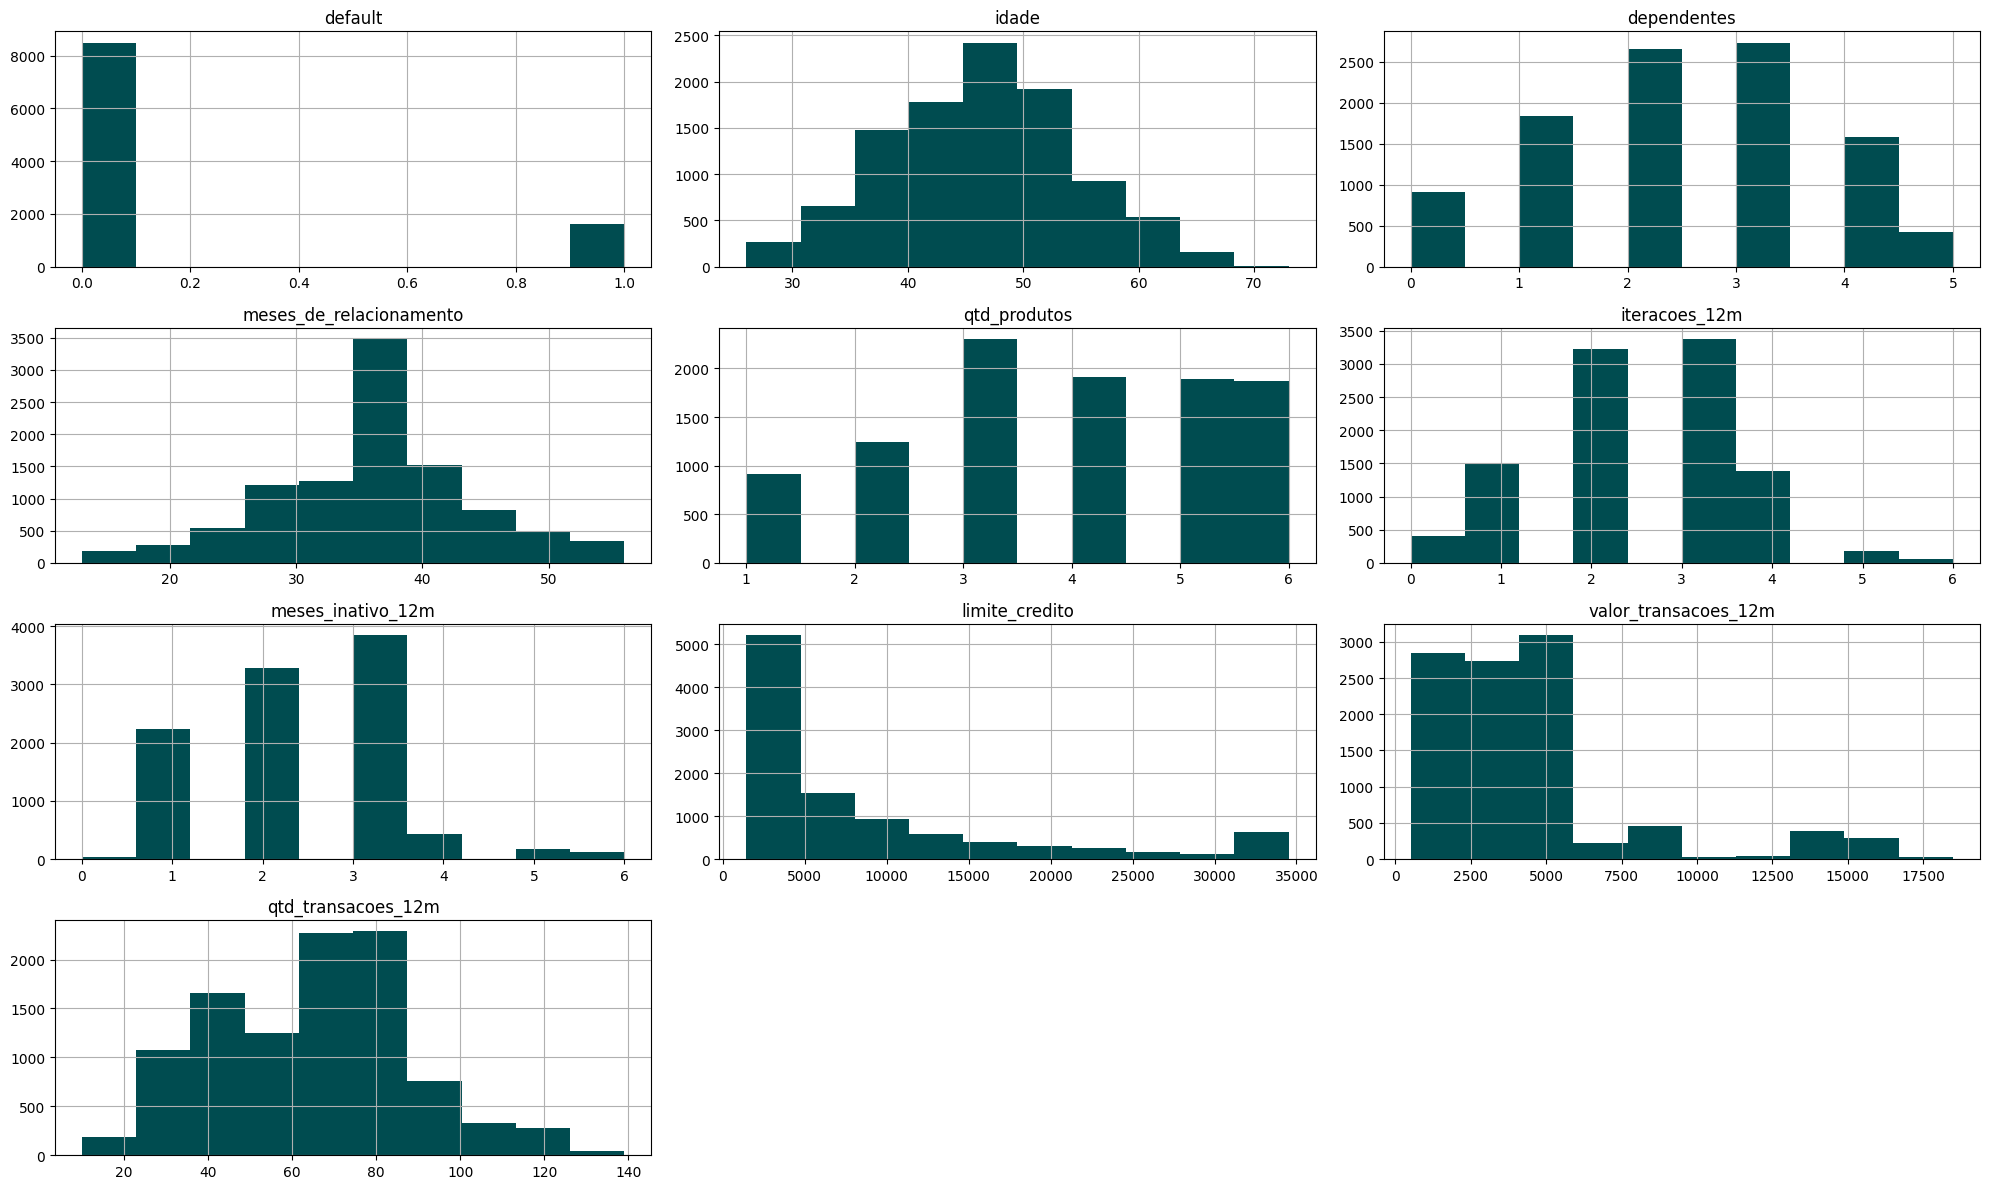

In [ ]:
df.hist(figsize=(20, 12), color=paleta_cores[0])
plt.tight_layout()
plt.show()

**Insights**

- A nossa váriável target está desbalanceada, com muito mais dados da classe 1. Isso sugere que técnicas de oversampling ou undersampling, poderão ser necessárias para garantir um modelo mais robusto.

- A faixa etária dos clientes é bastante concentrada em pessoas com mais de 45 anos, isso indica que boa parte dos clientes podem ter o perfil mais conservador. Porém, o banco precisa se atentar a este detalhe, pois, no longo prazo pode ocorrer o encolhimento da base de clientes. Estudar estratégias para atrair clientes mais jovens, garantindo uma base de clientes diversificada ao longo do tempo é recomendado.

- Os clientes possuem uma média de um pouco mais de 2 dependentes, e isso varia, de acordo com o desvio padrão em 1 depedente para mais ou menos, sendo que, pelo menos, 75% dos clientes tem até 3 filhos. Isso indica que os clientes deste banco podem estar interessados em adquirir mais produtos para atender as novas necessidades da familia em decorrência da expansão de dependentes. Elaborar uma estratégia de marketing e de venda para chamar a atenção deste público seria uma boa tomada de ação. No entanto, investigar clientes que deixam o banco antes desse período pode trazer insights sobre pontos de melhoria. Este projeto pode auxiliar o banco neste estudo.

- Olhando os meses de relacionamento, podemos ver que os clientes deste conjunto tem uma relação média de 3 anos. É um bom indicativo que as estratégias de retenção e os produtos, são bons o suficiente a ponto dos clientes quererem continuar mantendo uma relação com o banco.

- Olhando para quantidade de produtos, pode se interpretar que existe uma baixa diversificação, apenas 6 produtos são disponiblizados e a média da quantidade de produtos é de um pouco mais de 3 produtos. isso representa que os clientes em média  possuem aproximadamente 50% dos produtos. Olharemos mais tarde, na análise exploratória, a distribuição das frequências através de um histograma. Caso as frequências estejam muito parecidas, os produtos estão bem distribuídos entre os clientes e uma baixa oferta de produtos, pode ser um modelo de negócio.

- As iterações nos últimos 12 meses são uma boa métrica para avaliar o engajamento do banco com seus clientes. Também pode ser uma forma de avaliar os canais de comunicação. Como, a amplitude varia de 1 a 6 iterações, pode-se supor algumas coisas: 1- Os clientes são pouco engajados. 2- Os serviços que o banco presta são bons o suficiente que o cliente não ter que iteragir frequentemente com agências. 3- Os canais de comunicação podem estar defasados. Considerando que, a faixa etária dos clientes, correspondem a um grupo que pode ter dificuldades com meios digitais, isto talvez fosse uma justificativa para as baxas iterações. Um estudo sobre o assunto, é recomendado.

- Ao que parece, a quantidade de meses inativos, reforça o insight obtido com os meses de relacionamento, pois, em média, os clientes ficam só 2 meses inativos, com um desvio padrão de aproximadamente 1. Além disso, o máximo que um cliente ficou inativo foi 6 meses. Quanto maior for a inatividade do cliente, maior a chance de ele estar insatisfeito ou buscando alternativas em outros bancos. Analisar os motivos de inatividade mais longa pode revelar oportunidades de melhorar a satisfação e retenção de clientes.

- A média do limite de crédito é bastante alta, sugerindo que o banco

- A quantidade de transações no último ano, vai nos dar uma ideia sobre a receita do banco, a média é de 64 transações no ano. os departamentos responsáveis devem avaliar se esta é uma quantidade, principalmente considerando o desvio padrão de quase 24



Os gráficos de idade e de meses de relacionamento apresentam uma distribuição normal. Considerando que, o banco de dados é pequeno, podemos inferir que este conjunto é apenas uma amostra da população real de clientes do banco. Sendo assim podemos fazer estimativas para avaliar se algumas médias da amostra estão próximas da média populacional. A estimativa escolhida foi, intervalo de confiança

Utilizarei a biblioteca scypy.stats para realizar os cálculos. Os cálculos por sua vez, estarão armazenados em funções dedicadas.


Intervalo de confiança para a média da idade com 95.0% de confiança: (Limite inferior: 46.2, Limite superior: 46.5)



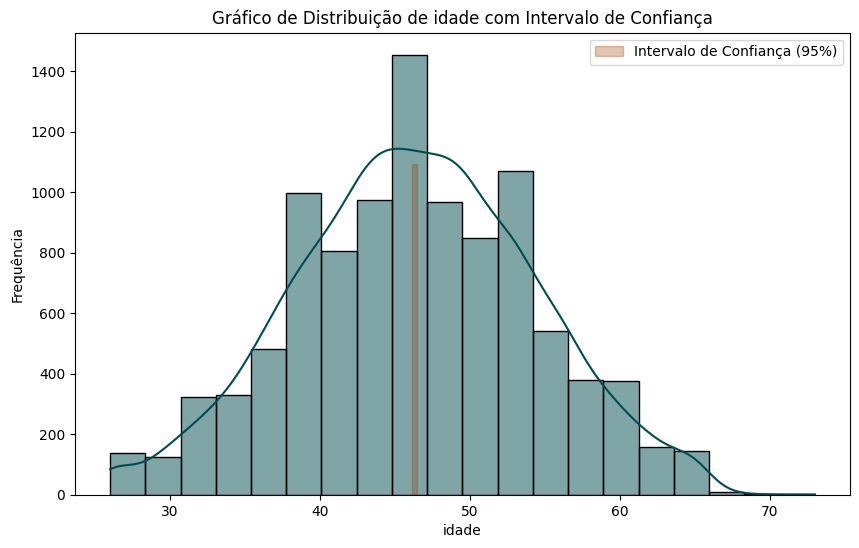

In [ ]:
calcular_intervalo_confianca('idade', 0.95)
print()
gerar_grafico_ditr_norm('idade')

Intervalo de confiança para a média da idade com 95.0% de confiança: (Limite inferior: 35.8, Limite superior: 36.1)



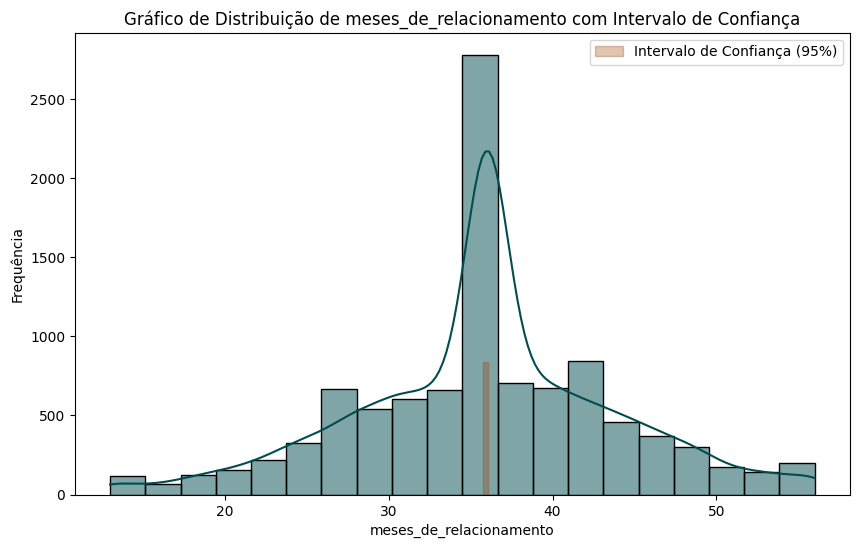

In [ ]:
calcular_intervalo_confianca('meses_de_relacionamento', 0.95)
print()
gerar_grafico_ditr_norm('meses_de_relacionamento')

É possível concluir para duas colunas que, há 95% de chance de que o intervalo de confiança conter o real valor das médias populacionais.

##**Variáveis categóricas**

Agora, vou analisar as variáveis categóricas

In [ ]:
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()

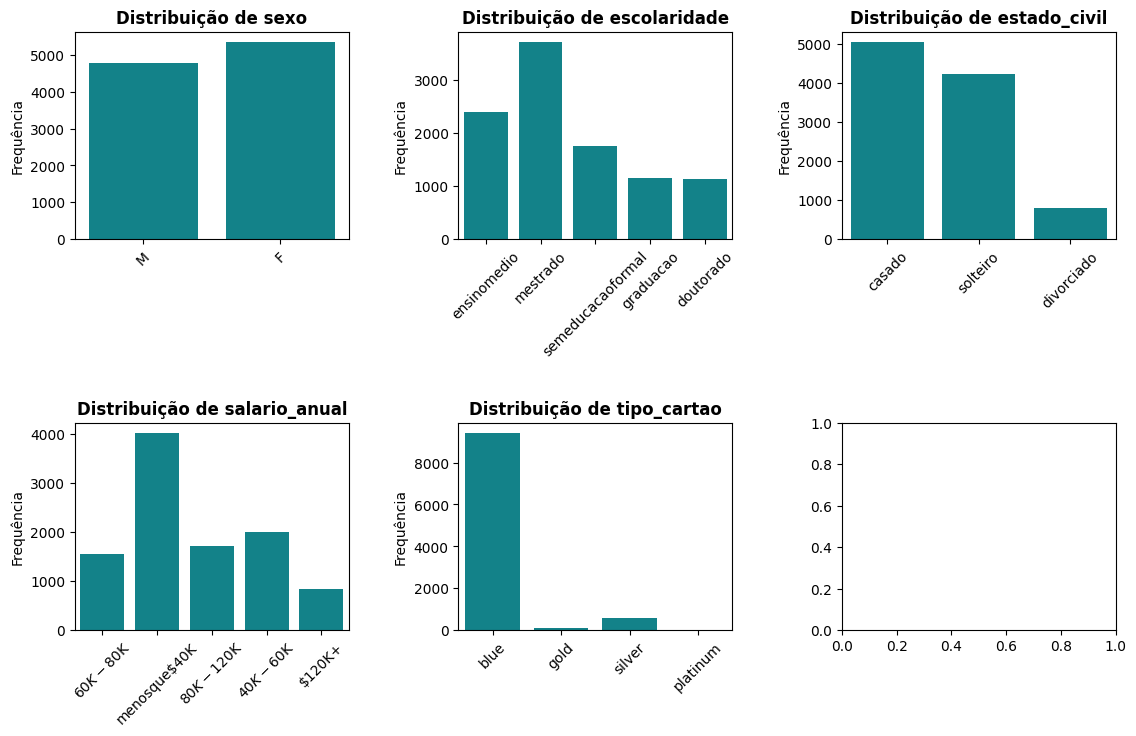

In [ ]:
#Definição do número de colunas
n_cols = 3
#Definição do número de linhas
n_rows = 2

#Criação da figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

#Um laço for para iterar pelas variáveis categóricas e plotar cada uma em um subplot
for i, variavel in enumerate(variaveis_categoricas):

    #Calcula a linha do subplot
    row = i // n_cols
    #Calcula a coluna do subplot
    col = i % n_cols
    #Seleciona o subplot correspondente
    ax = axes[row, col]

    sns.countplot(data=df, x=variavel, ax=ax, color=paleta_cores[1])
    ax.set_title(f'Distribuição de {variavel}', fontweight='bold')

    # Vou rotacionar os rótulos do eixo x para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')

plt.tight_layout(pad=3)
plt.show()

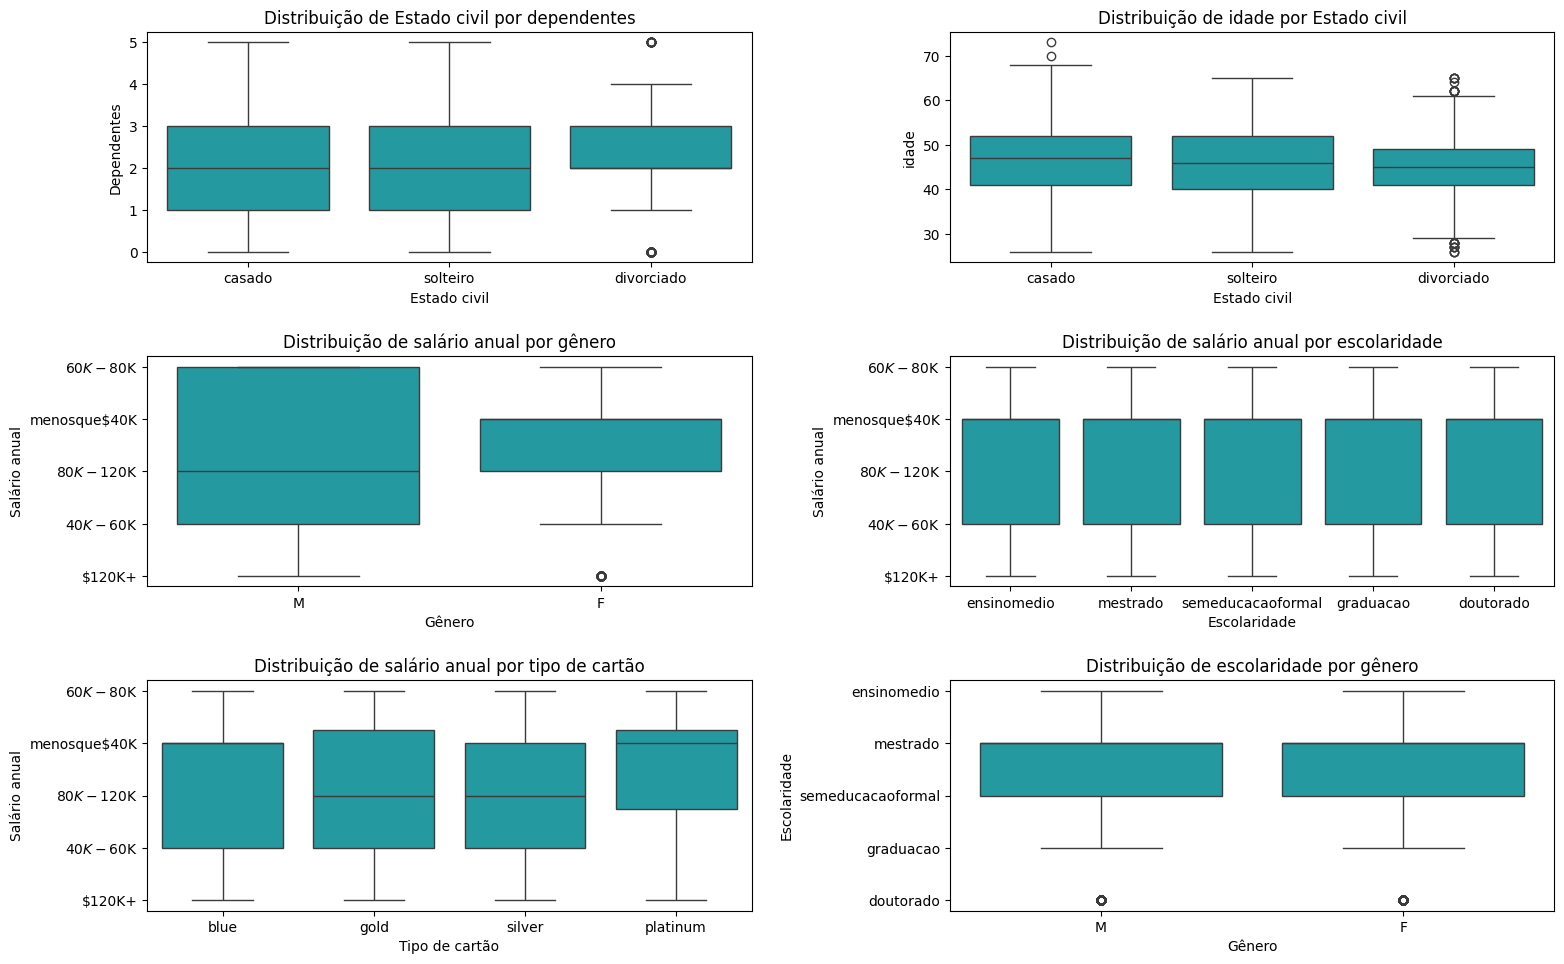

In [ ]:
fig2, gfs = plt.subplots(3, 2, figsize=(16, 10))

sns.boxplot(x='estado_civil', y='dependentes', data=df, ax = gfs[0,0], color=paleta_cores[2])
gfs[0,0].set_title('Distribuição de Estado civil por dependentes')
gfs[0,0].set_xlabel('Estado civil')
gfs[0,0].set_ylabel('Dependentes')

sns.boxplot(x='estado_civil', y='idade', data=df, ax=gfs[0,1], color=paleta_cores[2])
gfs[0,1].set_title('Distribuição de idade por Estado civil')
gfs[0,1].set_xlabel('Estado civil')
gfs[0,1].set_ylabel('idade')

sns.boxplot(x='sexo', y='salario_anual', data=df, ax=gfs[1,0], color=paleta_cores[2])
gfs[1,0].set_title('Distribuição de salário anual por gênero')
gfs[1,0].set_xlabel('Gênero')
gfs[1,0].set_ylabel('Salário anual')

sns.boxplot(x='escolaridade', y='salario_anual',data=df, ax=gfs[1,1], color=paleta_cores[2])
gfs[1,1].set_title('Distribuição de salário anual por escolaridade')
gfs[1,1].set_xlabel('Escolaridade')
gfs[1,1].set_ylabel('Salário anual')

sns.boxplot(x='tipo_cartao', y='salario_anual', data=df, ax=gfs[2,0], color=paleta_cores[2])
gfs[2,0].set_title('Distribuição de salário anual por tipo de cartão')
gfs[2,0].set_xlabel('Tipo de cartão')
gfs[2,0].set_ylabel('Salário anual')

sns.boxplot(x='sexo', y='escolaridade', data=df, ax=gfs[2,1], color=paleta_cores[2])
gfs[2,1].set_title('Distribuição de escolaridade por gênero')
gfs[2,1].set_xlabel('Gênero')
gfs[2,1].set_ylabel('Escolaridade')


plt.tight_layout(pad=2)
plt.show()


**Insights**

- Existe um maior número de clientes do sexo feminino, porém a diferença não é grande, portanto, é possível dizer que existe uma certa homogeneidade entre os gêneros dos clientes. Analisando a distribuição do salário entre os gêneros, vemos que os homens tem uma distribuição maior, além de ganharem os maiores salários. O nível de escolaridade está bem mais distribuído.

- A distribuição da escolaridade demonstra que o banco possui clientes que tem um alto grau de formação. A maioria possui mestrado, e a distribuição de doutores e graduados também é significativa. Chama atenção que, a distribuição dos salários é a mesma para diferentes niveis de formação.

- A maioria dos clientes é casado o que significa que o banco possui uma certa demanda para atender clientes que podem querer empréstimos ou financiamentos para adquirir um imóvel ou ainda podem querer outro tipo de serviço que atenda a necessidade do casal. No entanto, é preciso ter a mesma atenção para os clientes solteiros, pois eles possuem a mesma distribuição de dependentes que os casados. Mesmo não tendo a mesma distribuição que os demais, boa parte dos clientes divorciados, tem 2 ou 3 filhos. Ainda sobre o estado civil, não existem clientes com uma idade especifíca que esteja casado, solteiro ou divorciado.

- O tipo de cartão é a maior discrepância entre as variáveis categóricas, o cartão blue é acentuadamente o produto com mais usuários. Isso mostra que o  produto é de qualidade, porém, é recomendável que o banco estude formas de angariar clientes para os demais produtos. O cartão platinum, por exemplo, quase não tem clientes que o possuam.

- Se consideramos que o produto cartão blue é um produto de entrada, é coerente,
pois, grande parte dos clientes ganha menos de $40K. Da mesma forma, se consideramos que, o cartão platinum é um produto para uma classe com mais poder aquisitivo, também justifica ser pouco adquirido. No entanto, os clientes que ganham mais de 120K é representativo, e mesmo assim não parece haver muito interesse no produto, pois nenhum desses clientes possui o cartão.


##**Comparação com a variável target**

Para as variáveis quantitativas, irei utilizar o método T de Student para avaliar as diferenças das médias de cada variável numérica, com base na condição de default. Se a diferença for menor que 0.05 então, é possível dizer que a variável tem uma diferença significativa e portanto tem chances de estar relacionada com a inadimplência.

Após o teste, irei fazer a matriz de correlação de todas as variáveis numéricas com a variável target. Caso haja alguma variável que apresente uma diferença significativa no teste t, mas apresente correlação baixa, o modelo será testada com ela e depois sem ela para verificar a diferença.

Irei fazer o encodind das variaveis categóricas para jogá-las na matriz de correlação

In [ ]:
#Separando as variavés numéricas do df e depois excluindo a variável target
variaveis_numericas = df.select_dtypes(include=['float64', 'int']).columns.tolist()
variaveis_numericas.remove('default')

variaveis_numericas

['idade',
 'dependentes',
 'meses_de_relacionamento',
 'qtd_produtos',
 'iteracoes_12m',
 'meses_inativo_12m',
 'limite_credito',
 'valor_transacoes_12m',
 'qtd_transacoes_12m']

In [ ]:
#Hipótese nula (H0): As médias das idades dos dois grupos são iguais. Ou seja, o grupo em questão não tem impacto na inadimplência.

#Hipótese alternativa (H1): As médias das idades dos dois grupos são diferentes, e podem estar relacionadas com a inadimplência


calcula_T_student(variaveis_numericas, 0.05)

Estatística t para idade: -1.898750197469019
Valor p para idade: 0.057718632576338656
Não rejeitamos a hipótese nula: as médias não são significativamente diferentes.
--------------------------------------------------------------------------------
Estatística t para dependentes: -1.9398433006370537
Valor p para dependentes: 0.05251960405398706
Não rejeitamos a hipótese nula: as médias não são significativamente diferentes.
--------------------------------------------------------------------------------
Estatística t para meses_de_relacionamento: -1.4042246373276999
Valor p para meses_de_relacionamento: 0.16038505264259173
Não rejeitamos a hipótese nula: as médias não são significativamente diferentes.
--------------------------------------------------------------------------------
Estatística t para qtd_produtos: 14.944451354287043
Valor p para qtd_produtos: 3.225023329499345e-48
Rejeitamos a hipótese nula: as médias são significativamente diferentes.
----------------------------------

**Variáveis numéricas que possuem diferença significativa**

- qtd_produtos

- iteracoes_12m

- meses_inativo_12m

- limite_credito

- valor_transacoes_12m

- qtd_transacoes_12m

**Conclusões**

- qtd_transacoes_12m: Com uma correlação de -0.37, essa variável apresenta a correlação mais forte com a variável target, mas negativa. Isso sugere que, quanto maior a quantidade de transações nos últimos 12 meses, menor a probabilidade de inadimplência.

- iteracoes_12m e valor_transacoes_12m: Ambas apresentam correlações moderadas com default (0.20 e -0.17, respectivamente). iteracoes_12m está positivamente correlacionada, sugerindo que mais interações aumentam a chance de inadimplência, enquanto valor_transacoes_12m sugere uma relação inversa.

- meses_inativo_12m e qtd_produtos: Com correlações de 0.15 e -0.15, essas variáveis mostram relações fracas, mas não insignificantes. meses_inativo_12m (positiva) sugere que mais meses de inatividade estão associados a maior chance de inadimplência, enquanto qtd_produtos (negativa) sugere o contrário.

In [ ]:
# Aplicação do One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=variaveis_categoricas, prefix=variaveis_categoricas, drop_first=True, dummy_na=False)



default                           1.000000
iteracoes_12m                     0.204491
meses_inativo_12m                 0.152449
salario_anual_menosque$40K        0.027396
estado_civil_solteiro             0.025349
dependentes                       0.018991
idade                             0.018203
meses_de_relacionamento           0.013687
escolaridade_semeducacaoformal    0.011621
tipo_cartao_platinum              0.010823
tipo_cartao_gold                  0.005973
estado_civil_divorciado           0.002010
salario_anual_$80K-$120K         -0.004943
escolaridade_graduacao           -0.006442
tipo_cartao_silver               -0.008467
salario_anual_$40K-$60K          -0.009069
escolaridade_mestrado            -0.012370
escolaridade_ensinomedio         -0.015283
limite_credito                   -0.023873
salario_anual_$60K-$80K          -0.029369
sexo_M                           -0.037272
qtd_produtos                     -0.150005
valor_transacoes_12m             -0.168599
qtd_transac

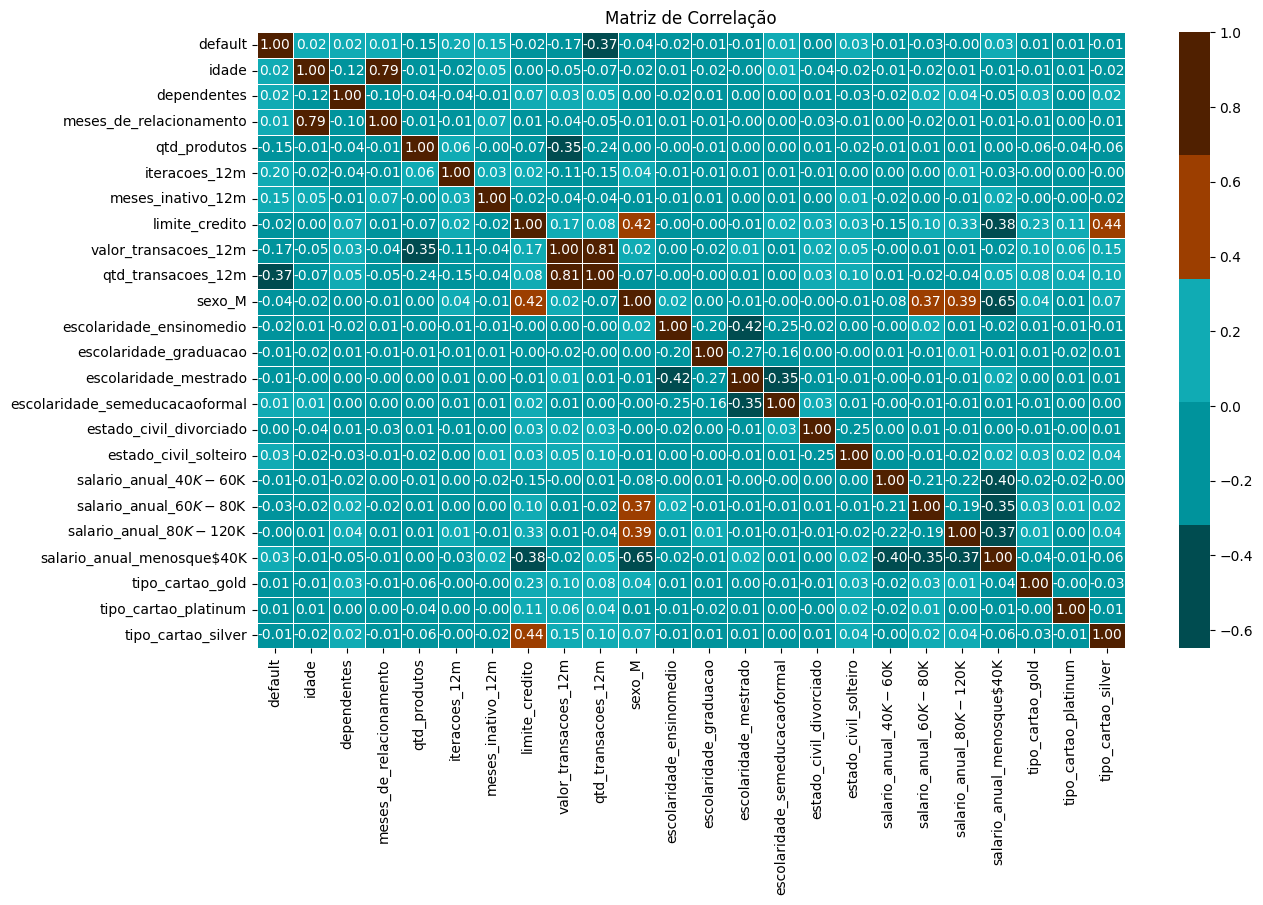

In [ ]:
matriz_correlacao = df_encoded.corr(numeric_only=True)

correlacao_variavel_target = matriz_correlacao['default'].sort_values(ascending=False)

ordenar_correlacao = correlacao_variavel_target.sort_values(ascending=False)

print(ordenar_correlacao)

plt.figure(figsize=(14, 8))
sns.heatmap(matriz_correlacao, cmap=paleta_cores, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Representação por meio de gráficos da relação das variáveis com a variável target

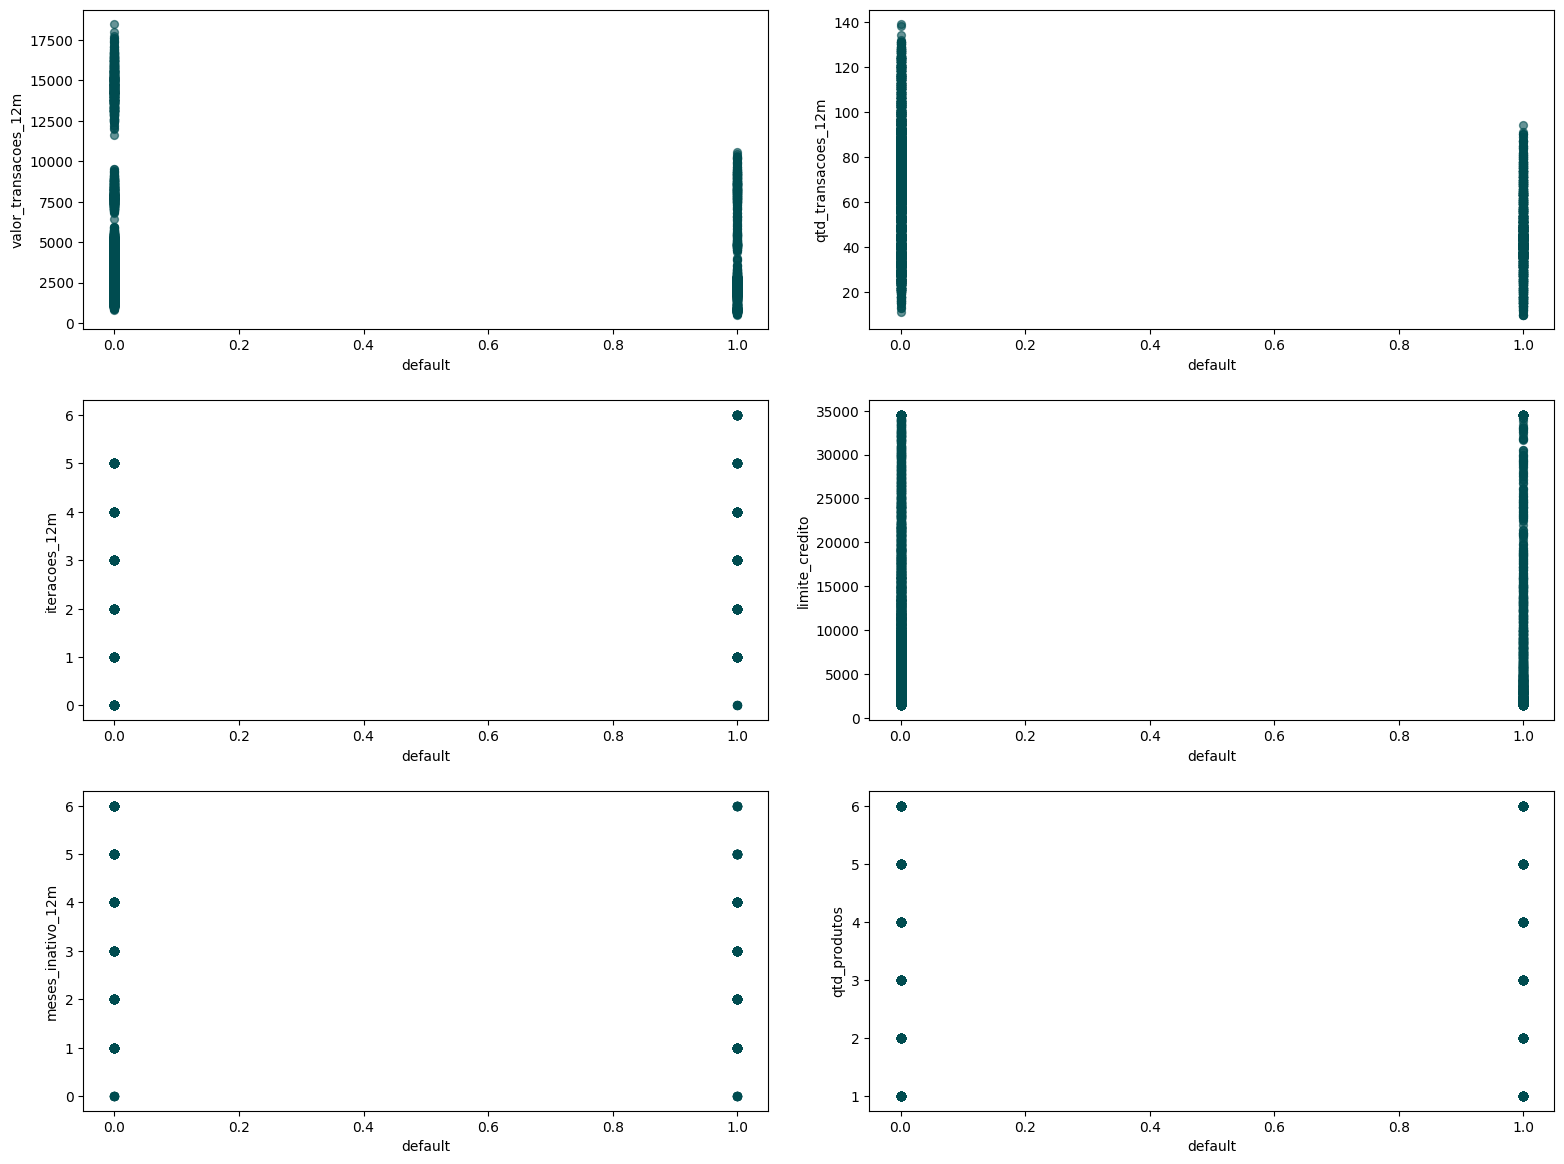

In [ ]:
fig3, xfs = plt.subplots(3, 2, figsize=(16, 12))

df.plot(kind='scatter', x='default', y='valor_transacoes_12m', ax=xfs[0, 0], s=32, alpha=.6)

df.plot(kind='scatter', x='default', y='qtd_transacoes_12m', ax=xfs[0, 1], s=32, alpha=.6)

df.plot(kind='scatter', x='default', y='iteracoes_12m', ax=xfs[1, 0], s=32, alpha=.6)

df.plot(kind='scatter', x='default', y='limite_credito', ax=xfs[1, 1], s=32, alpha=.6)

df.plot(kind='scatter', x='default', y='meses_inativo_12m', ax=xfs[2, 0], s=32, alpha=.6)

df.plot(kind='scatter', x='default', y='qtd_produtos', ax=xfs[2, 1], s=32, alpha=.6)

plt.tight_layout(pad=2)
plt.show()

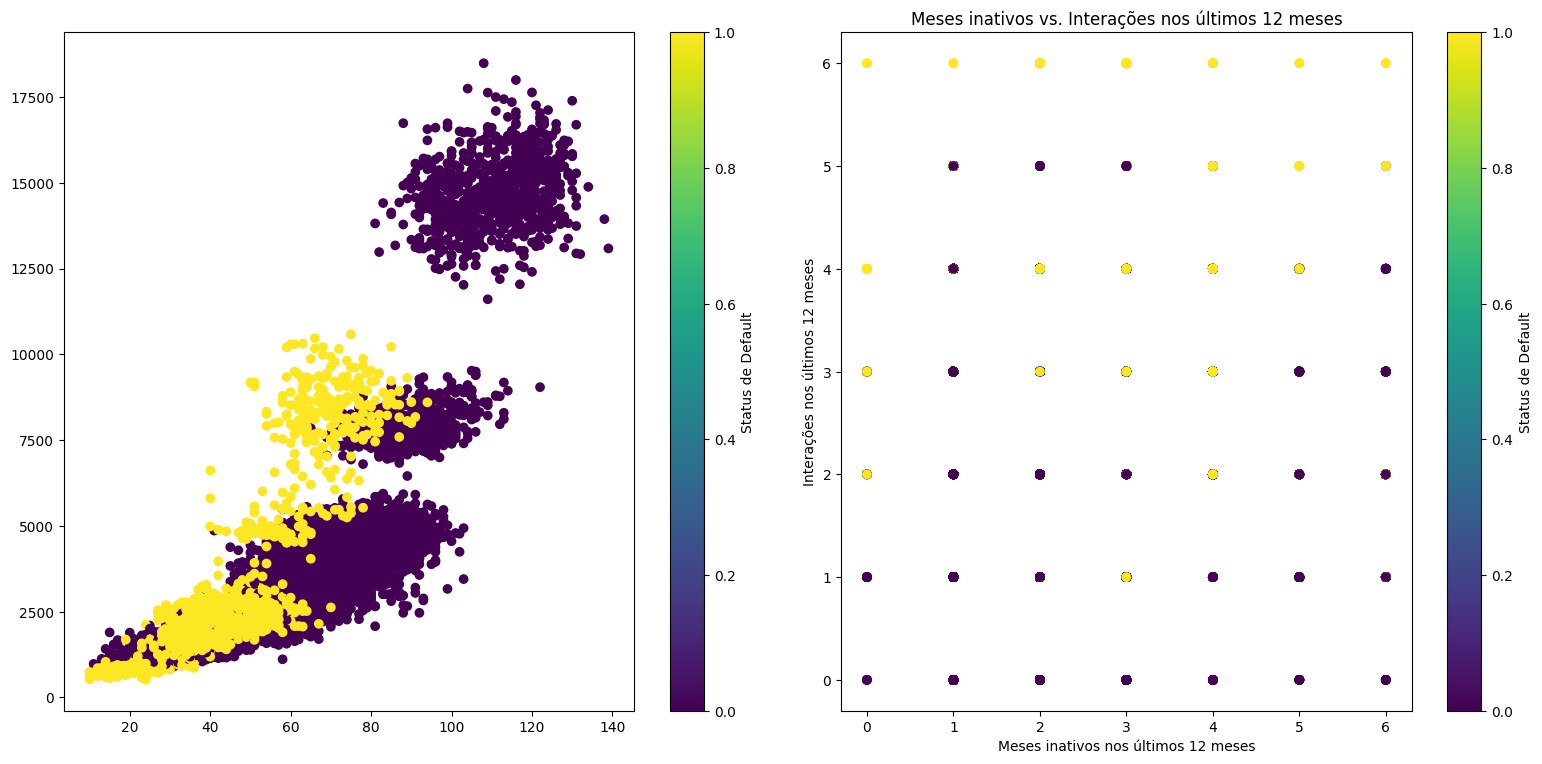

In [ ]:
fig4, tfs = plt.subplots(1, 2, figsize=(16, 8))

scatter_plot = tfs[0].scatter(df['qtd_transacoes_12m'], df['valor_transacoes_12m'], c=df['default'], cmap='viridis')
plt.xlabel('qtd_transacoes_12m')
plt.ylabel('valor_transacoes_12m')
plt.title('Relação entre qtd_transacoes_12m e valor_transacoes_12m')

filter_default = fig4.colorbar(scatter_plot, ax=tfs[0], label='Status de Default')

tfs[1].scatter(df['meses_inativo_12m'], df['iteracoes_12m'], c=df['default'], cmap='viridis')
plt.xlabel('Meses inativos nos últimos 12 meses')
plt.ylabel('Interações nos últimos 12 meses')
plt.title('Meses inativos vs. Interações nos últimos 12 meses')

scatter_plot2 = tfs[1].scatter(df['meses_inativo_12m'], df['iteracoes_12m'], c=df['default'], cmap='viridis')
filter_default = fig4.colorbar(scatter_plot2, ax=tfs[1], label='Status de Default')

plt.tight_layout(pad=2)
plt.show()

**Conclusões**

Após o teste T de student e a matriz de correlação, é possível dizer que as variáveis:

- idade

- dependentes

- meses de relacionamento

- Salario Anual

- Escolaridade

- Tipo Cartão

Pouco ou nada influenciam no padrão de inadimplência. limite_credito apresentou uma diferença significativa no teste t de Student, porém apresentou uma correlação baixa, mas não irei descartá-la

**Conclusões**

Essas análises indicam que, ao construir um modelo de previsão, as variáveis com correlação e significância estatística mais fortes, como qtd_transacoes_12m, iteracoes_12m, valor_transacoes_12m, limite_credito, meses_inativo_12m e qtd_produtos, provavelmente serão mais úteis para distinguir entre clientes inadimplentes e adimplentes.

# Criação do modelo

##**Separando os dados, Oversampling e normalização**

Vou separar como variáveis preditoras as variáveis qtd_transacoes_12m, iteracoes_12m, valor_transacoes_12m, limite_credito, meses_inativo_12m e qtd_produtos.

Separarei os dados em 80% para treino e 20% para teste.

Após a separação dos dados, irei fazer o oversampling da classe minoritória, no caso, a classe 1. O oversampling será feito somente nos dados de treino, para evitar enviesamento do modelo. Também irei realizar a normalização dos dados, somente para os dados de treino.

In [ ]:
features = df.iloc[:, [-1, -2,-3,-4, -5, -6]].values
target = df.iloc[:, 0].values



In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(features, target, test_size=0.2, random_state=42)

#Um print mostrando a divisão
print("Dados de x_treino",len(x_treino))
print("Dados de x_teste",len(x_teste), end='\n\n')

print("Dados de y_treino",len(y_treino))
print("Dados de y_teste",len(y_teste))

Dados de x_treino 8101
Dados de x_teste 2026

Dados de y_treino 8101
Dados de y_teste 2026


In [ ]:
valores_unicos, contagem = np.unique(y_treino, return_counts=True)

for valor, quantidade in zip(valores_unicos, contagem):
    print(f"Valor {valor}: {quantidade} dados")

Valor 0: 6801 dados
Valor 1: 1300 dados


In [ ]:
ros = RandomOverSampler(random_state=0)
x_treino_ros, y_treino_ros = ros.fit_resample(x_treino, y_treino)

valores_unicos, contagem = np.unique(y_treino_ros, return_counts=True)

for valor, quantidade in zip(valores_unicos, contagem):
    print(f"Valor {valor}: {quantidade} vezes")

Valor 0: 6801 vezes
Valor 1: 6801 vezes


In [ ]:
#Normalização dos dados de treino
scaler = MinMaxScaler()
scaler.fit(x_treino_ros)

x_treino_ros = scaler.transform(x_treino_ros)
x_teste = scaler.transform(x_teste)

##**Avaliação do modelo**

In [ ]:
modelo_preditor = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
modelo_preditor.fit(x_treino_ros, y_treino_ros)

RandomForestClassifier(random_state=42)

In [ ]:
predicao = modelo_preditor.predict(x_teste)

In [ ]:
confusion_matrix(y_teste, predicao)

array([[1629,   70],
       [  71,  256]])

In [ ]:
print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.79      0.78      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

